# insert dataset file as dataframe 



In [50]:
# from scipy.optimize import minimize
import numpy as np
import pandas as pd


df = pd.read_csv('99216031.csv')







# Extraction distance,speed & error speed  from dataframe

In [51]:
distance=df["distance[Mpc]"]
speed=df["speed[km/s]"]
deltaSpeed=df["speed*error[km/s]"]


# define function for calculating the v=h0*d and the penalty function 


v=h0*d has one Degree of freedom and we use penalty function to find that and here h0 is Degree of freedom

In [52]:
import sympy as sy
from sympy.solvers import solve


#define h0 as symbol(we dont know the value of that and we want to find that so it should consider as unknown variable of equation)
h0= sy.symbols('h0')

#function for v=h0*d
def v(h0,d):
  v=h0*d
  return v

#function to calculate the penalty function with f(x,a)=a*x == f(d,h0)=h0*d
def penalty_func(x,y,dely):
  #use the function v here
  x2=sum(((y-v(h0,x))/dely)**2)

  return x2



# find h0 

to find the h0 we need to solve :
$$ dX^2/dh0 =0$$

In [67]:
#call penalty function with data that we extract from dataframe
x2=penalty_func(distance,speed,deltaSpeed)
#derivation of penaty function 
dif = sy.diff(x2,h0)

# solve the equation (dx^2/dh0)=0 to drive h0 
h_0=(sy.solve(dif))
print('h0 we drive with "solve"',h_0)

#the output is a list but we need the value in that 
h_0=h_0[0]

print('h0 =',h_0)


h0 we drive with "solve" [65.5517751869032]
h0 = 65.5517751869032


# calculate delta h0

to find delta h0 we need to define a penalty function with f(x,a)=a*x as f(d,h0+delta h0) 

then we should substract penalty function with f(d,h0+delta h0) and penalty function with f(d,h0) 

when we solve this equation we will find delta h0:
$$ X^2(h0+deltah0)-X^2(h0)=1$$

In [68]:
# Δh

#define delh0 as symbol
delh0=sy.symbols('delh0')

#define new value as h0+dh0
b=h0+delh0


#define v  as v=(h0+dh0)*d
def v_err(b,d):
  v=(b)*d
  return v

#define penalty function with v=(h0+dh0)*d
def err_penalty_func(s,y,dely):
  err_x2=sum(((y-v_err(b,s))/dely)**2)

  return err_x2


#call penalty function with data
err_x2=err_penalty_func(distance,speed,deltaSpeed)

#substraction of X2(h0+deltah0)−X2(h0)=0
del_x2=sy.Add(err_x2,-1*x2)

#in "del_x2" equation h0 is a symbol we can substuting the value that we find 
del_x2=del_x2.subs({h0:h_0})

# solve ΔX^2=1
delta_h=(sy.solve(sy.Add(del_x2,-1)))

print(delta_h)


[-0.562109554208914, 0.562109554208834]


# define function for calculating the v=h0*d+h1*d^2 and the penalty function 


v=h0*d+h1*d^2 has two Degrees of freedom and we use penalty function to find that and here h0 and h1 is Degrees of freedom

In [70]:
from sympy.solvers.solveset import linsolve
#1-2
#v=h0d+h1d^2


#define h0 prime and h1 as symbol

h0_p= sy.symbols('h0')
h1= sy.symbols('h1')


#define v  as v=h0d+h1d^2 

def v_prime(h0_p,h1,d):
  v=h0_p*d+h1*(d**2)
  return v



#define penalty function with v=h0d+h1d^2 


def penalty_func_prime(s,y,dely):
  x2_prime=sum(((y-v_prime(h0_p,h1,s))/dely)**2)

  return x2_prime


#call penalty function with data
x2_prime=penalty_func_prime(distance,speed,deltaSpeed)

#derivation of penaty function but here we have two degrees of freedom so we have to do this ones for h0 and another time for h1 

dif_h0 = sy.diff(x2_prime,h0)
dif_h1 = sy.diff(x2_prime,h1)

dif = sy.diff(x2,h0)

# solve the equation (dx^2/dh0)=0 and (dx^2/dh1)=0 to drive h0 and h1
two_equation_solution=list(linsolve([dif_h0,dif_h1], (h0,h1)))
print("solution:",two_equation_solution)
# the output is a list that contains a tuple , the first value is h0 the second one is h1
h0_prime=list(linsolve([dif_h0,dif_h1], (h0,h1)))[0][0]
h_1=list(linsolve([dif_h0,dif_h1], (h0,h1)))[0][1]

print("h0:",h0_prime)
print("h1",h_1)

solution: [(64.0534799946749, 0.00530779571464327)]
h0: 64.0534799946749
h1 0.00530779571464327


In [56]:
from sympy.functions.special.hyper import HyperRep_sqrts1

delh1=sy.symbols('delh1')
e=h1+delh1
c=h0+delh0




def v_err_prime(c,e,d):
  v=c*d+e*(d**2)
  return v

def err_penalty_func_prime(s,y,dely,c,b):
  err_x2_prime=sum(((y-v_err_prime(c,b,s))/dely)**2)

  return err_x2_prime

err_x2_prime=err_penalty_func_prime(distance,speed,deltaSpeed,c,e)


del_x2_prime=sy.Add(err_x2_prime,-1*x2_prime)

del_x2_prime=del_x2_prime.subs({h1:h_1,h0:h0_prime})
# ΔX^2=2.3

delta_h1=(sy.solve(sy.Add(del_x2_prime,-2.3)))

eq1=sy.Add((list(delta_h1[0].items())[0][1]),-1*delh0)
eq2=sy.Add((list(delta_h1[1].items())[0][1]),-1*delh0)

print(sy.solve([eq1,eq2], (delh0,delh1),force=True, manual=True, set=True))


([delh0, delh1], {(-1.64362456689631, 0.00582263326873555), (1.64362456689609, -0.00582263326873484)})


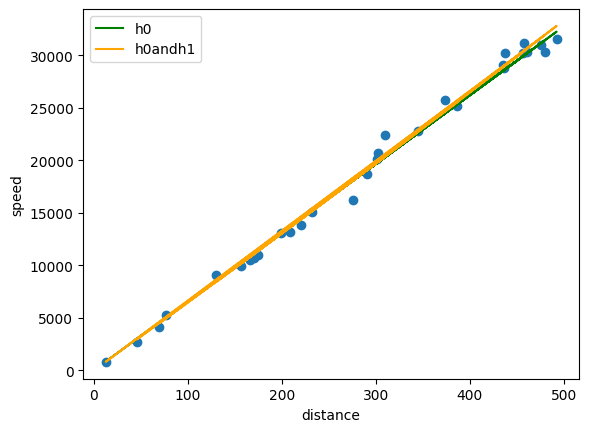

In [57]:
#1-3
import matplotlib.pyplot as plt

plt.scatter(distance,speed)
plt.ylabel('speed')
plt.xlabel('distance')
plt.plot(distance,h_0*distance,color='green',label='h0')
plt.plot(distance,h0_prime*distance+h_1*(distance**2),color='orange',label='h0andh1')
plt.legend()


In [58]:
#distane module to distance

dl= sy.symbols('dl')

def convert_distance(m):
  m=5*sy.log(dl/(1000*149597871*206265*pow(10,-6)))+25
  return m


# def m_to_megaparsk(x):
#   dist_mp=x/(1000*149597871*206265*pow(10,-6))
#   return dist_mp
print()

In [59]:
import scipy.optimize
from sklearn.linear_model import LinearRegression

df_real = pd.read_csv('real-data.csv')
distance_real=df_real["distance"]
speed_real=list(df_real["velocity"])

def convert_distance(m):
  dl=((pow(10,(m-25)/5)))
  return dl

dist=list(convert_distance(df_real["distance"]))
d = {'distance': dist, 'velocity': speed_real}
df = pd.DataFrame(data=d)

 6.309573e+66       761

-1.3672539641723308e-63


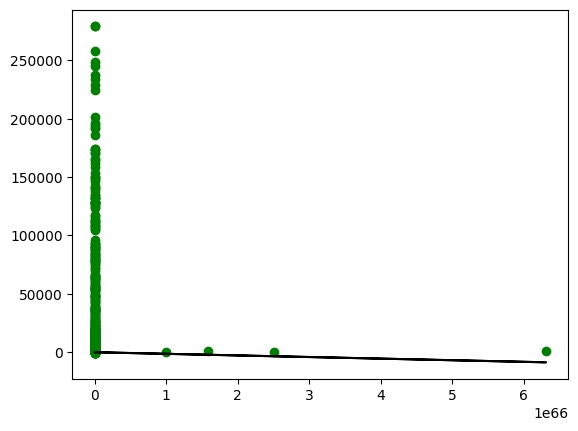

In [60]:
#2-1

distance_real=df["distance"]
speed_real=df["velocity"]

a,b= np.polyfit(distance_real, speed_real,1)
plt.scatter(distance_real, speed_real,color='g')
plt.plot(dist,a*distance_real ,color='k')
h0_realdata=a
print(h0_realdata)
plt.show()


In [61]:
from scipy import stats
def outliers_iqr(col):
    quartile_1, quartile_3 = np.percentile(col, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((col > upper_bound) | (col < lower_bound))

def remove_outlier(dataset):
    r,c = dataset.shape
    if c < 2 :
        return print("ERROR! data not in specifed format. Enter format as features, target.")
    data = dataset.iloc[:,:-1].values
    r,c = data.shape
    se=np.zeros([0])
    
    for i in range(c):
        if(dataset.dtypes[i] != 'object'):
            se = np.append(se,[outliers_iqr(data[:,i])])
    a = np.unique(se)
    dataset = dataset.drop(a)
    return dataset




65.68615387478144


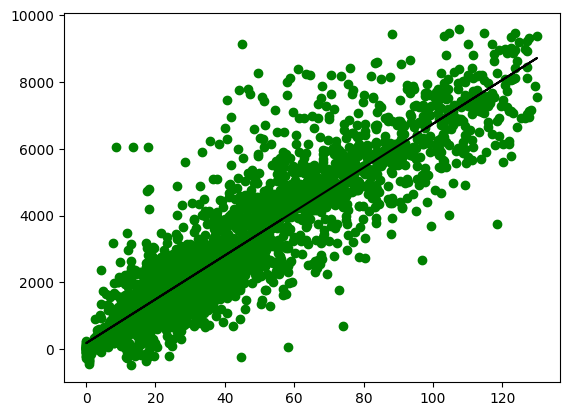

In [62]:
#2-2

df.drop_duplicates(inplace=True)
df.fillna(df.mean(), inplace = True)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out the rows that fall outside the 1.5 threshold in each column
df_real = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
distance_real=df_real["distance"]
speed_real=df_real["velocity"]

a,b= np.polyfit(distance_real, speed_real,1)
plt.scatter(distance_real, speed_real,color='g')
plt.plot(distance_real,a*distance_real+b ,color='k')
h0_eddited_data=a
print(h0_eddited_data)
plt.show()

-2.861444762881488e-63


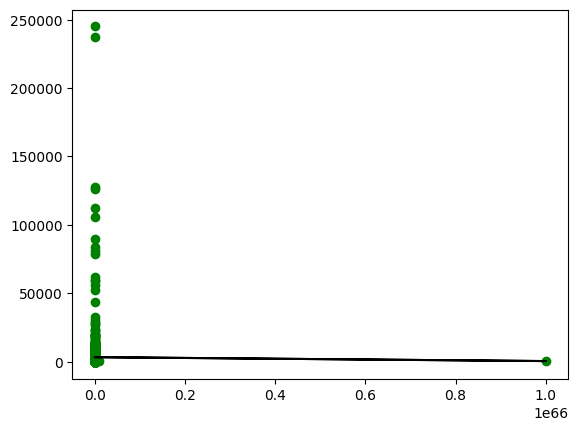

In [63]:
new_dataset = remove_outlier(df)             
new=pd.DataFrame(new_dataset)

distance_real=new["distance"]
speed_real=new["velocity"]

a,b= np.polyfit(distance_real, speed_real,1)
plt.scatter(distance_real, speed_real,color='g')
plt.plot(distance_real,a*distance_real+b ,color='k')
h0_eddited_data=a
print(h0_eddited_data)
plt.show()

A recent value of the Hubble constant 
H0
 is

71 km/sec/mega parsec.

1 mega parsec = 10^6 parsec and

1 parsec = 206265 AU.

1 AU = 149597871 km.

In [64]:
age=(1/(h0*(3.2408*(pow(10,-20)))*3600*24*365.26))
print(age)

977759203444.196/h0
